<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/Kaggle_Titanic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [28]:
train_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/train.csv')
test_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/test.csv')
test_sub_df = pd.read_csv('./drive/MyDrive/AI_INOVATION_SQUARE/data/titanic_data/gender_submission.csv')

###DataFrame 확인

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test_sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


###test 데이터에 정답 데이터(test_sub_df) 합치기

In [32]:
test_df['Survived'] = test_sub_df['Survived']

test_df = test_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex' ,'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


###train 데이터 missing data 처리(dropna())



In [33]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
train_df['Cabin'].fillna('NNN', inplace=True)
train_df['Embarked'].fillna('NNN', inplace=True)

In [35]:
train_df = train_df.dropna()

train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
len(train_df)

714

###test 데이터 missing data 처리(dropna())

In [37]:
test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [38]:
test_df = test_df.dropna()

test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
len(test_df)

331

###딥러닝을 위한 matrix 변환

In [40]:
train_csv_data = train_df.values
test_csv_data = test_df.values

print(type(train_csv_data), train_csv_data.shape)
print(type(test_csv_data), test_csv_data.shape)

<class 'numpy.ndarray'> (714, 12)
<class 'numpy.ndarray'> (331, 11)


###Data Conversion (문자 -> 숫자)

In [41]:
#male -> 1, female -> 0

for i in range(len(train_csv_data)):
    
    if train_csv_data[i,4] == 'male':
        train_csv_data[i,4] = 1
    
    else:
        train_csv_data[i,4] = 0

for i in range(len(test_csv_data)):

    if test_csv_data[i,4] == 'male':
        test_csv_data[i,4] = 1
    
    else:
        test_csv_data[i,4] = 0

In [42]:
#S -> 1, C -> 2, Q -> 3

for i in range(len(train_csv_data)):

    if train_csv_data[i,-1] == 'S':
        train_csv_data[i,-1] = 1
    
    elif train_csv_data[i,-1] == 'C':
        train_csv_data[i,-1] = 2
    
    elif train_csv_data[i,-1] == 'Q':
        train_csv_data[i,-1] = 3

for i in range(len(test_csv_data)):

    if test_csv_data[i,-1] == 'S':
        test_csv_data[i,-1] = 1
    
    elif test_csv_data[i,-1] == 'C':
        test_csv_data[i,-1] = 2
    
    elif test_csv_data[i,-1] == 'Q':
        test_csv_data[i,-1] = 3

###training data 생성

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NNN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NNN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NNN,S


In [44]:
training_input_data = train_csv_data[:, [2, 4,5,6,7,9]].astype('float32')
training_target_data = train_csv_data[:,1:2].astype('float32')

print("training_input_data.shpae = ", training_input_data.shape , ", training_target_data.shape = ", training_target_data.shape)

print(training_input_data[1])
print(training_target_data[1])

training_input_data.shpae =  (714, 6) , training_target_data.shape =  (714, 1)
[ 1.      0.     38.      1.      0.     71.2833]
[1.]


###test data 생성

In [45]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
test_input_data = test_csv_data[:, [2,4,5,6,7,9]].astype('float32')
test_target_data = test_csv_data[:,1:2].astype('float32')

print("test_input_data.shape = ", test_input_data.shape, ", test_target_data.shape = ", test_target_data.shape)

print(test_input_data[1])
print(test_target_data[1])

test_input_data.shape =  (331, 6) , test_target_data.shape =  (331, 1)
[ 3.  0. 47.  1.  0.  7.]
[1.]


###오차역전파를 사용하여 구현

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [48]:
class Kaggle_Titanic():

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

      self.W2 = np.random.randn(input_nodes, hidden_nodes) / np.sqrt(input_nodes / 2)
      self.b2 = np.random.rand(hidden_nodes)

      self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(hidden_nodes / 2)
      self.b3 = np.random.rand(output_nodes)

      self.learning_rate = learning_rate

  def feed_forward(self):

      delta = 1e-7

      self.z1 = self.input_data
      self.a1 = self.input_data

      self.z2 = np.dot(self.a1, self.W2) + self.b2
      self.a2 = sigmoid(self.z2)

      self.z3 = np.dot(self.a2, self.W3) + self.b3
      y = self.a3 = sigmoid(self.z3)

      return -np.sum(self.target_data * np.log(y+delta) + (1 - self.target_data) * np.log((1 - y) + delta))

  def loss_val(self):

      delta = 1e-7

      self.z1 = self.input_data
      self.a1 = self.input_data

      self.z2 = np.dot(self.a1, self.W2) + self.b2
      self.a2 = sigmoid(self.z2)

      self.z3 = np.dot(self.a2, self.W3) + self.b3
      y = self.a3 = sigmoid(self.z3)

      return -np.sum(self.target_data * np.log(y+delta) + (1 - self.target_data) * np.log((1 - y) + delta))

  def accuracy(self, test_input_data, test_target_data):

      matched_list = []

      temp_list = []
      index_label_prediction_list = []

      for i in range(len(test_input_data)):

          (real_val, predicted_num) = self.predict(np.array(test_input_data[i], dtype = np.float32, ndmin =2))

          if predicted_num == test_target_data[i]:
              matched_list.append(i)
          
          else:
              temp_list.append(i)
              temp_list.append(test_target_data[i])
              temp_list.append(predicted_num)

              index_label_prediction_list.append(temp_list)

              temp_list = []

      accuracy_val = len(matched_list) / len(test_input_data)

      return accuracy_val, index_label_prediction_list

  def train(self, input_data, target_data):

        self.input_data = input_data
        self.target_data = target_data

        loss_val = self.feed_forward()

        loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)
        loss_2 = np.dot(loss_3, self.W3.T) * self.a2 * (1 - self.a2)

        self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T, loss_3)
        self.b3 = self.b3 - self.learning_rate * loss_3

        self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T, loss_2)
        self.b2 = self.b2 - self.learning_rate * loss_2

  def predict(self, input_data):

        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)

        if y >= 0.5:
            predicted_num = 1
        
        else:
            predicted_num = 0

        return y, predicted_num        

In [49]:
#hyper_parameter

i_nodes = training_input_data.shape[1]
h_nodes = 50
o_nodes = 1
lr = 1e-4
epochs = 200

loss_val_list = []

train_acc_list = []
val_acc_list = []

titanic_obj = Kaggle_Titanic(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_input_data)):

        input_data = training_input_data[step]
        target_data = training_target_data[step]

        titanic_obj.train(np.array(input_data, dtype = np.float32, ndmin = 2), np.array(target_data, dtype = np.float32, ndmin = 2))

    cur_loss_val = titanic_obj.loss_val()
    print("epochs = ", i+1, ", loss value = ", cur_loss_val)

    loss_val_list.append(cur_loss_val)
    
    (train_accuracy, index_label_prediction_list) = titanic_obj.accuracy(training_input_data, training_target_data)
    (val_accuracy, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)

    train_acc_list.append(train_accuracy)
    val_acc_list.append(val_accuracy)

end_time = datetime.now()
print("\nElapsed time = ", end_time - start_time)

epochs =  1 , loss value =  0.9548404003892745
epochs =  2 , loss value =  0.8839704705805469
epochs =  3 , loss value =  0.8180236486745011
epochs =  4 , loss value =  0.760527049304103
epochs =  5 , loss value =  0.7128571217224677
epochs =  6 , loss value =  0.6739579785969457
epochs =  7 , loss value =  0.6419493090837397
epochs =  8 , loss value =  0.6151559539407394
epochs =  9 , loss value =  0.5923413727853036
epochs =  10 , loss value =  0.5726343937898055
epochs =  11 , loss value =  0.5554156683690614
epochs =  12 , loss value =  0.5402324316580817
epochs =  13 , loss value =  0.5267433177953452
epochs =  14 , loss value =  0.5146836389448431
epochs =  15 , loss value =  0.5038432609813259
epochs =  16 , loss value =  0.4940521073885803
epochs =  17 , loss value =  0.4851703484341656
epochs =  18 , loss value =  0.4770815443823203
epochs =  19 , loss value =  0.4696877087622282
epochs =  20 , loss value =  0.46290565889351915
epochs =  21 , loss value =  0.45666425537348293


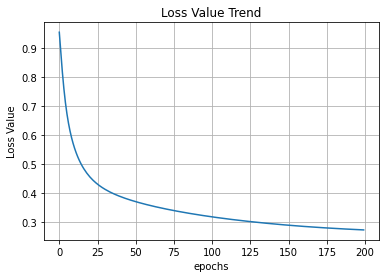

In [50]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss Value')
plt.grid()
plt.plot(loss_val_list)
plt.show()

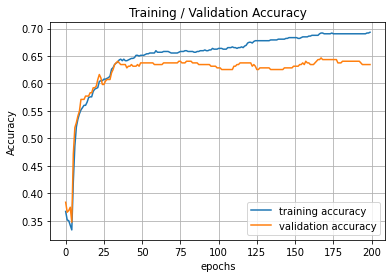

In [51]:
plt.title('Training / Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

In [52]:
(accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)
print("Accuracy = ", 100 * np.round(accuracy_val,3), '%')

Accuracy =  63.4 %


In [53]:
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

(d_probability, alive_or_dead) = titanic_obj.predict(dicaprio)

print(d_probability, alive_or_dead)

(w_probability, alive_or_dead) = titanic_obj.predict(winslet)

print(w_probability, alive_or_dead)

[[0.24457657]] 0
[[0.65323017]] 1
